In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from collections import defaultdict
import numpy as np

In [2]:
from jupyterthemes import jtplot

In [3]:
df = pd.read_csv('sns_df.csv')
df

,Unnamed: 0,Acquisition_Time,Hospital,Urgency_Type,Service,Emergency_Stage,Waiting_Time,People_Waiting,H_Name
0,0,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,4,17,0,S Jose
1,1,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,3,34,0,S Jose
2,2,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Cirurgia Geral,3,6,0,S Jose
3,3,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Oftalmologia,3,5,0,S Jose
4,4,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,2,309,8,S Jose
...,...,...,...,...,...,...,...,...,...
1603379,1603417,2019-04-29 23:59:41,218,Urgncia Central,Medicina,4,13,0,Santa Maria
1603380,1603418,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,3,10,0,Santa Maria
1603381,1603419,2019-04-29 23:59:41,218,Urgncia Central,Medicina,3,53,13,Santa Maria
1603382,1603420,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,2,52,1,Santa Maria


In [4]:
df_plot=df[['H_Name','Service','Waiting_Time','People_Waiting','Emergency_Stage']]

In [5]:
df_plot['H_Name'].unique()

array(['S Jose', 'Santa Maria', 'SFX', 'Estefania'], dtype=object)

In [6]:
hospital_s_jose = df_plot.loc[df['H_Name'] == 'S Jose']
hospital_s_maria = df_plot.loc[df['H_Name'] == 'Santa Maria']
hospital_s_xavier = df_plot.loc[df['H_Name'] == 'SFX']
hospital_estefania = df_plot.loc[df['H_Name'] == 'Estefania']

In [7]:
hospital_s_jose

,H_Name,Service,Waiting_Time,People_Waiting,Emergency_Stage
0,S Jose,Espera: Medicina Interna,17,0,4
1,S Jose,Espera: Medicina Interna,34,0,3
2,S Jose,Espera: Cirurgia Geral,6,0,3
3,S Jose,Espera: Oftalmologia,5,0,3
4,S Jose,Espera: Medicina Interna,309,8,2
...,...,...,...,...,...
1603369,S Jose,Espera: Medicina Interna,165,5,2
1603370,S Jose,Espera: Cirurgia Geral,3,0,2
1603371,S Jose,Espera: Oftalmologia,13,1,2
1603372,S Jose,Espera: Ortopedia,3,0,2


In [8]:
hospital_s_jose['Service'].unique()

array(['Espera: Medicina Interna', 'Espera: Cirurgia Geral',
       'Espera: Oftalmologia', 'Espera: Ortopedia',
       'Espera: Otorrinolaringologia', 'Espera: Pequena Cirurgia',
       'Aguarda Balcao (Medico)', 'Aguarda Balcao Trauma',
       'Aguarda Sector Ortopedico', 'Aguarda Cirurgia Plastica',
       'Aguarda Atendimento Geral', 'Espera por 1 observacao medica',
       'Aguarda Sector Psiquiatria', 'Aguarda Pequena Cirurgia Geral',
       'Aguarda Balcao (Cirurgia)'], dtype=object)

In [9]:
hospital_s_maria['Service'].unique()

array(['Cirurgia', 'Medicina', 'Aguarda Balcao (Cirurgia)',
       'Aguarda Balcao (Medico)', 'Aguarda Balcao Trauma',
       'Aguarda Sector Ortopedico', 'Aguarda Atendimento Geral',
       'Espera por 1 observacao medica', 'Espera: Pediatria',
       'Espera: Cirurgia', 'Espera: Otorrino',
       'Aguarda Pequena Cirurgia Geral'], dtype=object)

In [10]:
hospital_s_xavier['Service'].unique()

array(['Aguarda Balcao (Cirurgia)', 'Aguarda Atendimento Geral',
       'Aguarda Pequena Cirurgia Geral', 'Aguarda Balcao (Medico)',
       'Aguarda Cirurgia Plastica', 'Aguarda Balcao Trauma',
       'Aguarda Sector Ortopedico', 'Espera por 1 observacao medica',
       'Aguarda Sector Psiquiatria', 'Espera: Medicina Interna',
       'Espera: Cirurgia Geral', 'Espera: Ortopedia',
       'Espera: Oftalmologia', 'Espera: Pequena Cirurgia',
       'Espera: Otorrinolaringologia', 'Espera: Pediatria',
       'Sala de Espera Pos-Triagem', 'Aguardar Vaga/ECO/CTG/ Terapeutica',
       'Bloco de Partos'], dtype=object)

In [11]:
hospital_estefania['Service'].unique()

array(['Espera: Pediatria', 'Espera: Ortopedia', 'Espera: Cirurgia',
       'Espera: Otorrino'], dtype=object)

In [12]:
all_services_test=[]
all_services_test.append(hospital_s_jose['Service'].unique())
all_services_test.append(hospital_s_maria['Service'].unique())
all_services_test.append(hospital_s_xavier['Service'].unique())
all_services_test.append(hospital_estefania['Service'].unique())

In [13]:
services_list=[]

for i in all_services_test:
    for s in i:
        if s not in services_list:
            services_list.append(s)
        else:
            pass
        
services_list

['Espera: Medicina Interna',
 'Espera: Cirurgia Geral',
 'Espera: Oftalmologia',
 'Espera: Ortopedia',
 'Espera: Otorrinolaringologia',
 'Espera: Pequena Cirurgia',
 'Aguarda Balcao (Medico)',
 'Aguarda Balcao Trauma',
 'Aguarda Sector Ortopedico',
 'Aguarda Cirurgia Plastica',
 'Aguarda Atendimento Geral',
 'Espera por 1 observacao medica',
 'Aguarda Sector Psiquiatria',
 'Aguarda Pequena Cirurgia Geral',
 'Aguarda Balcao (Cirurgia)',
 'Cirurgia',
 'Medicina',
 'Espera: Pediatria',
 'Espera: Cirurgia',
 'Espera: Otorrino',
 'Sala de Espera Pos-Triagem',
 'Aguardar Vaga/ECO/CTG/ Terapeutica',
 'Bloco de Partos']

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

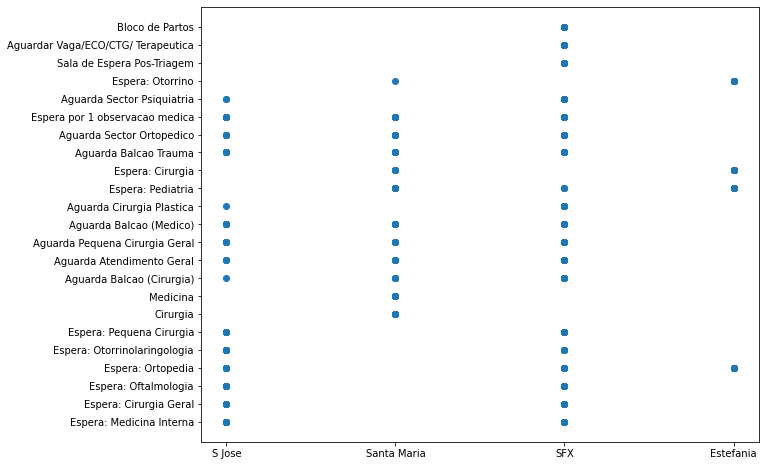

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(df['H_Name'],df['Service'])
plt.xticks(rotation = 0)

In [15]:
services_dict={'hospital_s_jose':hospital_s_jose['Service'].unique(),
               'hospital_s_maria':hospital_s_maria['Service'].unique(),
               'hospital_s_xavier':hospital_s_xavier['Service'].unique(),
               'hospital_estefania':hospital_estefania['Service'].unique()} 
services_dict

{'hospital_s_jose': array(['Espera: Medicina Interna', 'Espera: Cirurgia Geral',
        'Espera: Oftalmologia', 'Espera: Ortopedia',
        'Espera: Otorrinolaringologia', 'Espera: Pequena Cirurgia',
        'Aguarda Balcao (Medico)', 'Aguarda Balcao Trauma',
        'Aguarda Sector Ortopedico', 'Aguarda Cirurgia Plastica',
        'Aguarda Atendimento Geral', 'Espera por 1 observacao medica',
        'Aguarda Sector Psiquiatria', 'Aguarda Pequena Cirurgia Geral',
        'Aguarda Balcao (Cirurgia)'], dtype=object),
 'hospital_s_maria': array(['Cirurgia', 'Medicina', 'Aguarda Balcao (Cirurgia)',
        'Aguarda Balcao (Medico)', 'Aguarda Balcao Trauma',
        'Aguarda Sector Ortopedico', 'Aguarda Atendimento Geral',
        'Espera por 1 observacao medica', 'Espera: Pediatria',
        'Espera: Cirurgia', 'Espera: Otorrino',
        'Aguarda Pequena Cirurgia Geral'], dtype=object),
 'hospital_s_xavier': array(['Aguarda Balcao (Cirurgia)', 'Aguarda Atendimento Geral',
        'Agua

In [51]:
hospital_estefania[hospital_estefania['Service'] == 'Espera: Pediatria']\
.groupby('Emergency_Stage')['Waiting_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Emergency_Stage,,,,,,,,
1,5930.0,67.687521,71.290118,0.0,13.0,46.0,99.0,435.0
2,54808.0,44.343381,41.961513,0.0,15.0,31.0,60.0,433.0
3,61867.0,34.183975,27.607719,0.0,15.0,26.0,45.0,217.0
4,33362.0,13.670703,9.132266,0.0,7.0,11.0,17.0,126.0
5,11.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [71]:
def check_services(hospital,hospital_str):
    
    list_of_stats = ['count','mean','std','min','25%','50%','75%','max']
    list_of_stages = ['1','2','3','4','5']
    describe_dict = {}
    stats_dict={}
    number_dict={}
    n = 0
    m = 0
    
    for i in services_dict[hospital_str]:
        try:
            n=0
            m=0
            info=hospital[hospital['Service'] == i].sort_values(by=['Waiting_Time'])\
            .groupby('Emergency_Stage')
            
            mean=info['Waiting_Time'].describe()['mean']
            std=info['Waiting_Time'].describe()['std']
            
            print(i)
            #sns.lmplot(x='Waiting_Time', y='People_Waiting', data=hospital[hospital['Service']==i]
             #          , hue='Emergency_Stage', fit_reg=False)
            
            #plt.plot(info['Waiting_Time'],norm.pdf(info['Waiting_Time'],mean,std))
            plt.show()
            
            stats_dict = {}
            number_dict = {}
            
            for stages in range(len(info['Waiting_Time'].describe())):     
                for stats in info['Waiting_Time'].describe().iloc[m,:]:
                    
                    stats_dict[list_of_stats[n]] = stats
                    
                    n=n+1 
                    
                number_dict[list_of_stages[stages]] = stats_dict
                
                stats_dict = {}
                
                n=0
                m=m+1
            
            describe_dict[i]=number_dict   
            
        except Exception as e:
            print(e)
    
    return describe_dict


In [72]:
stats_s_jose = check_services(hospital_s_jose,'hospital_s_jose')
stats_s_maria = check_services(hospital_s_maria,'hospital_s_maria')
stats_s_xavier = check_services(hospital_s_xavier,'hospital_s_xavier')
stats_estefania = check_services(hospital_estefania,'hospital_estefania')

Espera: Medicina Interna
Espera: Cirurgia Geral
Espera: Oftalmologia
Espera: Ortopedia
Espera: Otorrinolaringologia
Espera: Pequena Cirurgia
Aguarda Balcao (Medico)
Aguarda Balcao Trauma
Aguarda Sector Ortopedico
Aguarda Cirurgia Plastica
Aguarda Atendimento Geral
Espera por 1 observacao medica
Aguarda Sector Psiquiatria
Aguarda Pequena Cirurgia Geral
Aguarda Balcao (Cirurgia)
Cirurgia
Medicina
Aguarda Balcao (Cirurgia)
Aguarda Balcao (Medico)
Aguarda Balcao Trauma
Aguarda Sector Ortopedico
Aguarda Atendimento Geral
Espera por 1 observacao medica
Espera: Pediatria
Espera: Cirurgia
Espera: Otorrino
Aguarda Pequena Cirurgia Geral
Aguarda Balcao (Cirurgia)
Aguarda Atendimento Geral
Aguarda Pequena Cirurgia Geral
Aguarda Balcao (Medico)
Aguarda Cirurgia Plastica
Aguarda Balcao Trauma
Aguarda Sector Ortopedico
Espera por 1 observacao medica
Aguarda Sector Psiquiatria
Espera: Medicina Interna
Espera: Cirurgia Geral
Espera: Ortopedia
Espera: Oftalmologia
Espera: Pequena Cirurgia
Espera: Otorr

## Para colocar os outputs da função em dataframes (melhor visualização dos dados)

In [76]:
stats_s_jose = pd.DataFrame.from_dict({(i,j): stats_s_jose[i][j] 
                           for i in stats_s_jose.keys() 
                           for j in stats_s_jose[i].keys()},
                       orient='index')

stats_s_maria = pd.DataFrame.from_dict({(i,j): stats_s_maria[i][j] 
                           for i in stats_s_maria.keys() 
                           for j in stats_s_maria[i].keys()},
                       orient='index')

stats_s_xavier = pd.DataFrame.from_dict({(i,j): stats_s_xavier[i][j] 
                           for i in stats_s_xavier.keys() 
                           for j in stats_s_xavier[i].keys()},
                       orient='index')

stats_estefania = pd.DataFrame.from_dict({(i,j): stats_estefania[i][j] 
                           for i in stats_estefania.keys() 
                           for j in stats_estefania[i].keys()},
                       orient='index')

In [88]:
stats_estefania

count       mean        std   min   25%   50%    75%  \
Espera: Pediatria 1   5930.0  67.687521  71.290118   0.0  13.0  46.0   99.0   
                  2  54808.0  44.343381  41.961513   0.0  15.0  31.0   60.0   
                  3  61867.0  34.183975  27.607719   0.0  15.0  26.0   45.0   
                  4  33362.0  13.670703   9.132266   0.0   7.0  11.0   17.0   
                  5     11.0   0.000000   0.000000   0.0   0.0   0.0    0.0   
Espera: Ortopedia 1   1210.0  25.454545  27.496266   0.0   7.0  15.0   35.0   
                  2  18196.0  20.836777  21.833288   0.0   7.0  14.0   26.0   
                  3   9580.0  17.955324  18.653278   0.0   7.0  12.0   22.0   
                  4    611.0  16.731588  23.215737   0.0   7.0  10.0   21.0   
Espera: Cirurgia  1   2288.0  28.525350  34.969538   1.0   7.0  17.0   35.0   
                  2   9203.0  26.179941  28.357868   0.0   9.0  17.0   33.0   
                  3  16092.0  22.164367  21.001961   0.0   8.0  15.0   28.0   
                  4   3134.0  18.440332  18.011667   0.0   7.0  13.0   25.0   
                  5      9.0   0.000000   0.000000   0.0   0.0   0.0    0.0   
Espera: Otorrino  1     13.0   8.230769  29.676460   0.0   0.0   0.0    0.0   
                  2    212.0  86.613208  92.975263   1.0  23.0  52.5  112.5   
                  3    225.0  46.555556  38.727733   4.0  16.0  38.0   66.0   
                  4     12.0  23.000000   0.000000  23.0  23.0  23.0   23.0   

                       max  
Espera: Pediatria 1  435.0  
                  2  433.0  
                  3  217.0  
                  4  126.0  
                  5    0.0  
Espera: Ortopedia 1  166.0  
                  2  286.0  
                  3  258.0  
                  4  225.0  
Espera: Cirurgia  1  266.0  
                  2  312.0  
                  3  205.0  
                  4  137.0  
                  5    0.0  
Espera: Otorrino  1  107.0  
                  2  369.0  
                  3  165.0  
                  4   23.0

In [132]:
equal_services = np.in1d(services_dict['hospital_s_jose'],services_dict['hospital_s_maria'])

In [151]:
n=0
array=[]
for i in equal_services:
    if i == True:
        array.append(services_dict['hospital_s_jose'][n])
    else:
        pass
    n=n+1

In [20]:
def hospital_efficiency(hospital):
    n=0
    for i in equal_services:
        if i == True:
            print(services_dict['hospital_s_jose'][n])
        else:
            pass
        n=n+1
    
    

TypeError: 'NoneType' object is not subscriptable

In [ ]:
stats_s_maria['Espera: Pediatria']

In [ ]:
stats_estefania['Espera: Pediatria']

In [ ]:
stats_s_maria['Espera: Pediatria']['count'] / stats_s_maria['Espera: Pediatria']['mean']

In [ ]:
stats_s_xavier['Espera: Pediatria']['count'] / stats_s_xavier['Espera: Pediatria']['mean']

In [ ]:
stats_estefania['Espera: Pediatria']['count'] / stats_estefania['Espera: Pediatria']['mean']

In [ ]:
def hospital_efficiency():
    stats_s_jose

In [ ]:
h_s_v= hospital_estefania[hospital_estefania['Service'] == 'Espera: Pediatria'].sort_values(by=['People_Waiting'])
h_s_v

In [ ]:
h_s_v['People_Waiting'].describe()

In [ ]:
plt.plot(h_s_v['People_Waiting'],norm.pdf(h_s_v['People_Waiting'],3.86,2.95))

In [ ]:
norm.pdf(h_s_v['Waiting_Time'],34.64,36.1)

In [ ]:
hospital_estefania[hospital_estefania['Service'] == 'Espera: Pediatria']

In [ ]:
df.groupby(['Hospital']).count()

In [ ]:
print(df['Acquisition_Time'][0])
print(df['Acquisition_Time'].tail)

In [ ]:
print(df['Acquisition_Time'][-1])

In [ ]:
df_twitter = pd.read_csv('twitter_df_mass_media.csv')
df_twitter

In [ ]:
df_twitter.iloc[:,1:].describe

In [ ]:
services = set()

for i in range(len(df)):
    if 'Espera:' in df['Service'][i]:
        text=df['Service'][i].split('Espera:')
        text = text[1:]
        [services.add(a) for a in text]
    else:
        services.add(df['Service'][i])

print(services)

In [ ]:
for i in range(len(df_twitter['Text'])):
    try:
        if 'Hospital' in df_twitter['Text'][i]:
            print(df_twitter['Text'][i])
    except Exception as e:
        pass